In [1]:
from google.colab import files
upload=files.upload()

Saving fraud payment data.csv to fraud payment data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import io
df = pd.read_csv(io.BytesIO(upload['fraud payment data.csv']),encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


modifying the data frame according to our needs
1. changing the categorical variables to numerical type for the ease of computation
2. dropping the columns with merchant and customer zip code because both the columns take only 1 value for the entire data set
3. dropping transactions with amount=0, because if there has been no transaction at all there is no question of fraud in that case, having such data might be misleading and increases the non fraud cases unnecessarilly

In [4]:
encoder=LabelEncoder()
df['customer']=encoder.fit_transform(df['customer'])
df['age']=encoder.fit_transform(df['age'])
df['gender']=encoder.fit_transform(df['gender'])
df['merchant']=encoder.fit_transform(df['merchant'])
df['category']=encoder.fit_transform(df['category'])
df.drop(['zipcodeOri','zipMerchant'],axis=1,inplace=True)
df=df.query('amount>0')
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


splitting the data frame into 2 other data frame, one for fraud and one for non fraud cases respectively

In [5]:
fraud = df[df['fraud']==1]
non_fraud = df[df['fraud']==0]
print(fraud.shape , non_fraud.shape)

(7200, 8) (587391, 8)


splitting the data from into dependent (y) and independent variables (x)

In [6]:
x=df.drop('fraud',axis=1)
y=df['fraud']
print(x.head())
print(y.head())

   step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72
0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


correlation between the variable

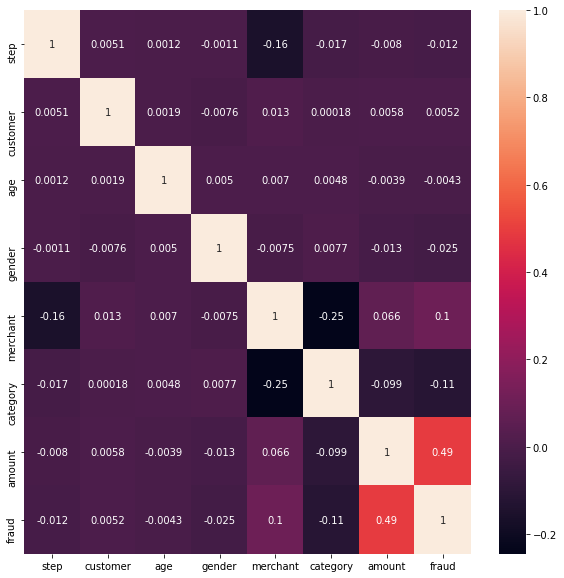

In [7]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

checking whether fraud is dependent on other categorical variables or not, using chi square test of independence for categorical variables

In [8]:
from scipy.stats import chi2_contingency
chisq=df
alpha=0.05

print('chi sq test of independence between fraud and steps')
chisq_table=pd.crosstab(chisq['fraud'],chisq['step'])
stat, p, dof, expected = chi2_contingency(chisq_table)
# interpret p-value
print("p value is " + str(p))
if p <= alpha:
     print('Dependent (reject H0)')
else:
     print('Independent (H0 holds true)')
print('\n')

print('chi sq test of independence between fraud and customer')
chisq_table=pd.crosstab(chisq['fraud'],chisq['customer'])
stat, p, dof, expected = chi2_contingency(chisq_table)
# interpret p-value
print("p value is " + str(p))
if p <= alpha:
     print('Dependent (reject H0)')
else:
     print('Independent (H0 holds true)')
print('\n')

print('chi sq test of independence between fraud age')
chisq_table=pd.crosstab(chisq['fraud'],chisq['age'])
stat, p, dof, expected = chi2_contingency(chisq_table)
# interpret p-value
print("p value is " + str(p))
if p <= alpha:
     print('Dependent (reject H0)')
else:
     print('Independent (H0 holds true)')
print('\n')

print('chi sq test of independence between fraud and gender')
chisq_table=pd.crosstab(chisq['fraud'],chisq['gender'])
stat, p, dof, expected = chi2_contingency(chisq_table)
# interpret p-value
print("p value is " + str(p))
if p <= alpha:
     print('Dependent (reject H0)')
else:
     print('Independent (H0 holds true)')
print('\n')

print('chi sq test of independence between fraud and merchant')
chisq_table=pd.crosstab(chisq['fraud'],chisq['merchant'])
stat, p, dof, expected = chi2_contingency(chisq_table)
# interpret p-value
print("p value is " + str(p))
if p <= alpha:
     print('Dependent (reject H0)')
else:
     print('Independent (H0 holds true)')
print('\n')

print('chi sq test of independence between fraud and category')
chisq_table=pd.crosstab(chisq['fraud'],chisq['category'])
stat, p, dof, expected = chi2_contingency(chisq_table)
# interpret p-value
print("p value is " + str(p))
if p <= alpha:
     print('Dependent (reject H0)')
else:
     print('Independent (H0 holds true)')
print('\n')

chi sq test of independence between fraud and steps
p value is 0.999999936271118
Independent (H0 holds true)


chi sq test of independence between fraud and customer
p value is 0.0
Dependent (reject H0)


chi sq test of independence between fraud age
p value is 2.00866504430546e-07
Dependent (reject H0)


chi sq test of independence between fraud and gender
p value is 5.932305999855071e-85
Dependent (reject H0)


chi sq test of independence between fraud and merchant
p value is 0.0
Dependent (reject H0)


chi sq test of independence between fraud and category
p value is 0.0
Dependent (reject H0)




splitting into training and testing sets

In [9]:
x_new=pd.DataFrame(data=df,columns=['amount','category','merchant','gender','age','customer'])
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=0)

creating a new data frame for the ease of keeping track of how each models work

In [54]:
models={'name':['logistic regression (simple)','logistic regression (under sampling)','logistic regression (over sampling)','logistic regression (smote)','support vector machine (simple)','support vector machine (under sampling)','support vector machine (over sampling)','support vector machine (smote)','decision tree (simple)','decision tree (under sampling)','decision tree (over sampling)','decision tree (smote)','random forest (simple)','random forest (under sampling)','random forest (over sampling)','random forest (smote)','naive bayes (simple)','naive bayes (under sampling)','naive bayes (over sampling)','naive bayes (smote)','knn (simple)','knn (under sampling)','knn (over sampling)','knn (smote)']}
models = pd.DataFrame(models)
models['accuracy']=np.nan
models['precision score']=np.nan
models['recall score']=np.nan
models['f1 score']=np.nan
models['difference in accuracy (in %)']=np.nan
models['difference in recall (in %)']=np.nan
models['difference in precision (in %)']=np.nan
models['difference in f1 score (in %)']=np.nan
models.head()

,name,accuracy,precision score,recall score,f1 score,difference in accuracy (in %),difference in recall (in %),difference in precision (in %),difference in f1 score (in %)
0,logistic regression (simple),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,logistic regression (under sampling),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,logistic regression (over sampling),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,logistic regression (smote),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,support vector machine (simple),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


a function for implementation of models and computing how well they re performing

In [55]:
def get_report(model,x_train,x_test,y_train,y_test,name):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(name,'\n')
  classification_report_m=classification_report(y_test,y_pred)
  print(classification_report_m)
  confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
  print('confusion matrix')
  print(confusion_matrix, '\n')

  print('for test data')
  accuracy=accuracy_score(y_test,y_pred)
  print('accuracy =',accuracy)
  precision_score_m=precision_score(y_test,y_pred)
  print('presicion score = ',precision_score_m)
  recall_score_m=recall_score(y_test,y_pred)
  print('recall score =',recall_score_m)
  f1_score_m=f1_score(y_test,y_pred)
  print('F1 score =',f1_score_m)
  print('\n')

  print('for train data')
  y_pred_train=model.predict(x_train)
  accuracy_t=accuracy_score(y_train,y_pred_train)
  print('accuracy =',accuracy_t)
  precision_score_m_t=precision_score(y_train,y_pred_train)
  print('presicion score = ',precision_score_m_t)
  recall_score_m_t=recall_score(y_train,y_pred_train)
  print('recall score =',recall_score_m_t)
  f1_score_m_t=f1_score(y_train,y_pred_train)
  print('F1 score =',f1_score_m_t)
  print('\n')

  print('to understand whether our model is overfitting or underfitting')
  print('difference in f1 scores')
  print(f1_score_m_t,' - ',f1_score_m,' = ',f1_score_m_t-f1_score_m)
  print('in percentage = ',(f1_score_m_t-f1_score_m)*100)
  print('difference in recall scores')
  print(recall_score_m_t,' - ',recall_score_m,' = ',recall_score_m_t-recall_score_m)
  print('in percentage = ',(recall_score_m_t-recall_score_m)*100)
  print('difference in precision scores')
  print(precision_score_m_t,' - ',precision_score_m,' = ',precision_score_m_t-precision_score_m)
  print('in percentage = ',(precision_score_m_t-precision_score_m)*100)
  print('difference in accuracy scores')
  print(accuracy_t,' - ',accuracy,' = ',accuracy_t-accuracy)
  print('in percentage = ',(accuracy_t-accuracy)*100)

  models.loc[models['name'] == name, 'accuracy'] = accuracy
  models.loc[models['name'] == name, 'precision score'] = precision_score_m
  models.loc[models['name'] == name, 'recall score'] = recall_score_m
  models.loc[models['name'] == name, 'f1 score'] = f1_score_m
  models.loc[models['name'] == name, 'difference in f1 score (in %)'] = (f1_score_m_t-f1_score_m)*100
  models.loc[models['name'] == name, 'difference in accuracy (in %)'] = (accuracy_t-accuracy)*100
  models.loc[models['name'] == name, 'difference in recall (in %)'] = (recall_score_m_t-recall_score_m)*100
  models.loc[models['name'] == name, 'difference in precision (in %)'] = (precision_score_m_t-precision_score_m)*100

due to imbalance in our data, we decided to try 3 methods
1. under sampling
2. over sampling
3. smote
to understand how well the balancing techniques work for this data set

In [56]:
rus=RandomUnderSampler()
x2_train,y2_train=rus.fit_sample(x_train,y_train)
np.bincount(y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([5735, 5735])

In [57]:
ros = RandomOverSampler()
x3_train,y3_train=ros.fit_sample(x_train,y_train)
np.bincount(y3_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([469937, 469937])

In [58]:
smt=SMOTE()
x4_train,y4_train=smt.fit_sample(x_train,y_train)
np.bincount(y4_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([469937, 469937])

1. model - LOGISTIC REGRESSION

In [59]:
logistic_regression=LogisticRegression(max_iter=1000)

name='logistic regression (simple)'
get_report(logistic_regression,x_train,x_test,y_train,y_test,name)

logistic regression (simple) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    117454
           1       0.88      0.58      0.70      1465

    accuracy                           0.99    118919
   macro avg       0.94      0.79      0.85    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117336    118]
 [   618    847]] 

for test data
accuracy = 0.9938109133107409
presicion score =  0.877720207253886
recall score = 0.5781569965870307
F1 score = 0.697119341563786


for train data
accuracy = 0.9939433054709969
presicion score =  0.8775132275132275
recall score = 0.5783783783783784
F1 score = 0.6972149238045192


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.6972149238045192  -  0.697119341563786  =  9.558224073324961e-05
in percentage =  0.009558224073324961
difference in recall scores
0.5783783783783784  -  0.5781569965870307  =  0.00022138179134767455
in p

In [60]:
name='logistic regression (under sampling)'
get_report(logistic_regression,x2_train,x_test,y2_train,y_test,name)

logistic regression (under sampling) 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    117454
           1       0.18      0.88      0.30      1465

    accuracy                           0.95    118919
   macro avg       0.59      0.91      0.64    118919
weighted avg       0.99      0.95      0.97    118919

confusion matrix
[[111649   5805]
 [   182   1283]] 

for test data
accuracy = 0.9496548070535407
presicion score =  0.18101015801354403
recall score = 0.8757679180887372
F1 score = 0.30001169180404536


for train data
accuracy = 0.9150828247602442
presicion score =  0.9516220830961867
recall score = 0.8746294681778553
F1 score = 0.911502816645466


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.911502816645466  -  0.30001169180404536  =  0.6114911248414205
in percentage =  61.14911248414205
difference in recall scores
0.8746294681778553  -  0.8757679180887372  =  -0.001138449910881966

In [61]:
name ='logistic regression (over sampling)'
get_report(logistic_regression,x3_train,x_test,y3_train,y_test,name)

logistic regression (over sampling) 

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    117454
           1       0.19      0.87      0.31      1465

    accuracy                           0.95    118919
   macro avg       0.59      0.91      0.64    118919
weighted avg       0.99      0.95      0.97    118919

confusion matrix
[[111976   5478]
 [   184   1281]] 

for test data
accuracy = 0.9523877597356184
presicion score =  0.18952507767421217
recall score = 0.8744027303754266
F1 score = 0.31152723735408555


for train data
accuracy = 0.9131255891747192
presicion score =  0.950042653017701
recall score = 0.8721105169416326
F1 score = 0.9094100352259173


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.9094100352259173  -  0.31152723735408555  =  0.5978827978718317
in percentage =  59.78827978718317
difference in recall scores
0.8721105169416326  -  0.8744027303754266  =  -0.002292213433794043

In [62]:
name = 'logistic regression (smote)'
get_report(logistic_regression,x4_train,x_test,y4_train,y_test,name)

logistic regression (smote) 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    117454
           1       0.17      0.87      0.29      1465

    accuracy                           0.95    118919
   macro avg       0.59      0.91      0.63    118919
weighted avg       0.99      0.95      0.96    118919

confusion matrix
[[111369   6085]
 [   184   1281]] 

for test data
accuracy = 0.9472834450340147
presicion score =  0.1739071409177301
recall score = 0.8744027303754266
F1 score = 0.29011436983354094


for train data
accuracy = 0.9136958783836983
presicion score =  0.9454921676642316
recall score = 0.8780091799539087
F1 score = 0.9105019898867194


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.9105019898867194  -  0.29011436983354094  =  0.6203876200531784
in percentage =  62.038762005317835
difference in recall scores
0.8780091799539087  -  0.8744027303754266  =  0.003606449578482107
in perc

In [63]:
models.dropna()

,name,accuracy,precision score,recall score,f1 score,difference in accuracy (in %),difference in recall (in %),difference in precision (in %),difference in f1 score (in %)
0,logistic regression (simple),0.993811,0.877720,0.578157,0.697119,0.013239,0.022138,-0.020698,0.009558
1,logistic regression (under sampling),0.949655,0.181010,0.875768,0.300012,-3.457198,-0.113845,77.061193,61.149112
2,logistic regression (over sampling),0.952388,0.189525,0.874403,0.311527,-3.926217,-0.229221,76.051758,59.788280
3,logistic regression (smote),0.947283,0.173907,0.874403,0.290114,-3.358757,0.360645,77.158503,62.038762


here we are encountering a problem, which can be written in points as
1. if we do not use any sampling technique, we get a decent precision score, a bad recall score (which makes it a bad model)
2. but if we use any sampling technique then there is a significant increase in recall but also a significant decrease in precision
3. there is no significant difference between over sampling and smote
4. also there is a provision for us to say that there is an observable figure denoting over fitting in case of the sampling techniques

2. model - SUPPORT VECTOR MACHINE

In [64]:
#support_vector_machine=SVC()
#name='support vector machine (simple)'
#get_report(support_vector_machine,x_train,x_test,y_train,y_test,name)

In [65]:
#name='support vector machine (under sampling)'
#get_report(support_vector_machine,x2_train,x_test,y2_train,y_test,name)

In [66]:
#name='support vector machine (over sampling)'
#get_report(support_vector_machine,x3_train,x_test,y3_train,y_test,name)

In [67]:
#name='support vector machine (smote)'
#get_report(support_vector_machine,x4_train,x_test,y4_train,y_test,name)

3. model - DECISION TREE

In [68]:
gini = DecisionTreeClassifier(criterion = "gini",random_state = 100)

name='decision tree (simple)'
get_report(gini,x_train,x_test,y_train,y_test,name)

decision tree (simple) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.75      0.77      0.76      1465

    accuracy                           0.99    118919
   macro avg       0.87      0.88      0.88    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117074    380]
 [   340   1125]] 

for test data
accuracy = 0.9939454586735509
presicion score =  0.7475083056478405
recall score = 0.7679180887372014
F1 score = 0.7575757575757576


for train data
accuracy = 1.0
presicion score =  1.0
recall score = 1.0
F1 score = 1.0


to understand whether our model is overfitting or underfitting
difference in f1 scores
1.0  -  0.7575757575757576  =  0.24242424242424243
in percentage =  24.242424242424242
difference in recall scores
1.0  -  0.7679180887372014  =  0.23208191126279865
in percentage =  23.208191126279864
difference in precision scores
1.0  -  0.7475083056478405  =  0.2524

In [69]:
name='decision tree (under sampling)'
get_report(gini,x2_train,x_test,y2_train,y_test,name)

decision tree (under sampling) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    117454
           1       0.26      0.95      0.41      1465

    accuracy                           0.97    118919
   macro avg       0.63      0.96      0.70    118919
weighted avg       0.99      0.97      0.98    118919

confusion matrix
[[113515   3939]
 [    70   1395]] 

for test data
accuracy = 0.9662879775309244
presicion score =  0.26152980877390325
recall score = 0.9522184300341296
F1 score = 0.41035446389174873


for train data
accuracy = 1.0
presicion score =  1.0
recall score = 1.0
F1 score = 1.0


to understand whether our model is overfitting or underfitting
difference in f1 scores
1.0  -  0.41035446389174873  =  0.5896455361082513
in percentage =  58.964553610825135
difference in recall scores
1.0  -  0.9522184300341296  =  0.04778156996587035
in percentage =  4.778156996587035
difference in precision scores
1.0  -  0.26152980877390325 

In [70]:
name='decision tree (over sampling)'
get_report(gini,x3_train,x_test,y3_train,y_test,name)

decision tree (over sampling) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.77      0.74      0.75      1465

    accuracy                           0.99    118919
   macro avg       0.88      0.87      0.87    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117123    331]
 [   386   1079]] 

for test data
accuracy = 0.9939706859290778
presicion score =  0.7652482269503547
recall score = 0.736518771331058
F1 score = 0.750608695652174


for train data
accuracy = 1.0
presicion score =  1.0
recall score = 1.0
F1 score = 1.0


to understand whether our model is overfitting or underfitting
difference in f1 scores
1.0  -  0.750608695652174  =  0.24939130434782597
in percentage =  24.939130434782598
difference in recall scores
1.0  -  0.736518771331058  =  0.26348122866894197
in percentage =  26.348122866894197
difference in precision scores
1.0  -  0.7652482269503547  =  0.2

In [71]:
name='decision tree (smote)'
get_report(gini,x4_train,x_test,y4_train,y_test,name)

decision tree (smote) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.73      0.78      0.75      1465

    accuracy                           0.99    118919
   macro avg       0.86      0.89      0.88    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117031    423]
 [   324   1141]] 

for test data
accuracy = 0.9937184133738091
presicion score =  0.729539641943734
recall score = 0.778839590443686
F1 score = 0.7533839551006932


for train data
accuracy = 1.0
presicion score =  1.0
recall score = 1.0
F1 score = 1.0


to understand whether our model is overfitting or underfitting
difference in f1 scores
1.0  -  0.7533839551006932  =  0.24661604489930677
in percentage =  24.661604489930678
difference in recall scores
1.0  -  0.778839590443686  =  0.221160409556314
in percentage =  22.116040955631398
difference in precision scores
1.0  -  0.729539641943734  =  0.27046035805

4. model - RANDOM FOREST CLASSIFIER

In [72]:
rfc=RandomForestClassifier(n_estimators=100)

name='random forest (simple)'
get_report(rfc,x_train,x_test,y_train,y_test,name)

random forest (simple) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.87      0.76      0.81      1465

    accuracy                           1.00    118919
   macro avg       0.93      0.88      0.91    118919
weighted avg       1.00      1.00      1.00    118919

confusion matrix
[[117287    167]
 [   347   1118]] 

for test data
accuracy = 0.9956777302197294
presicion score =  0.8700389105058366
recall score = 0.7631399317406143
F1 score = 0.8130909090909092


for train data
accuracy = 1.0
presicion score =  1.0
recall score = 1.0
F1 score = 1.0


to understand whether our model is overfitting or underfitting
difference in f1 scores
1.0  -  0.8130909090909092  =  0.1869090909090908
in percentage =  18.69090909090908
difference in recall scores
1.0  -  0.7631399317406143  =  0.23686006825938566
in percentage =  23.686006825938566
difference in precision scores
1.0  -  0.8700389105058366  =  0.129961

In [73]:
name='random forest (under sampling)'
get_report(rfc,x2_train,x_test,y2_train,y_test,name)

random forest (under sampling) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    117454
           1       0.26      0.98      0.42      1465

    accuracy                           0.97    118919
   macro avg       0.63      0.97      0.70    118919
weighted avg       0.99      0.97      0.98    118919

confusion matrix
[[113429   4025]
 [    27   1438]] 

for test data
accuracy = 0.9659263868683726
presicion score =  0.2632253340655318
recall score = 0.9815699658703072
F1 score = 0.41512702078521946


for train data
accuracy = 1.0
presicion score =  1.0
recall score = 1.0
F1 score = 1.0


to understand whether our model is overfitting or underfitting
difference in f1 scores
1.0  -  0.41512702078521946  =  0.5848729792147805
in percentage =  58.48729792147805
difference in recall scores
1.0  -  0.9815699658703072  =  0.018430034129692796
in percentage =  1.8430034129692796
difference in precision scores
1.0  -  0.2632253340655318  

In [74]:
name='random forest (over sampling)'
get_report(rfc,x3_train,x_test,y3_train,y_test,name)

random forest (over sampling) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.82      0.79      0.80      1465

    accuracy                           1.00    118919
   macro avg       0.91      0.90      0.90    118919
weighted avg       1.00      1.00      1.00    118919

confusion matrix
[[117193    261]
 [   303   1162]] 

for test data
accuracy = 0.9952572759609483
presicion score =  0.8165846802529867
recall score = 0.7931740614334472
F1 score = 0.8047091412742382


for train data
accuracy = 1.0
presicion score =  1.0
recall score = 1.0
F1 score = 1.0


to understand whether our model is overfitting or underfitting
difference in f1 scores
1.0  -  0.8047091412742382  =  0.1952908587257618
in percentage =  19.52908587257618
difference in recall scores
1.0  -  0.7931740614334472  =  0.20682593856655285
in percentage =  20.682593856655284
difference in precision scores
1.0  -  0.8165846802529867  =  0

In [75]:
name='random forest (smote)'
get_report(rfc,x4_train,x_test,y4_train,y_test,name)

random forest (smote) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.81      0.80      0.80      1465

    accuracy                           1.00    118919
   macro avg       0.90      0.90      0.90    118919
weighted avg       1.00      1.00      1.00    118919

confusion matrix
[[117179    275]
 [   296   1169]] 

for test data
accuracy = 0.9951984123647188
presicion score =  0.8095567867036011
recall score = 0.7979522184300342
F1 score = 0.8037126160192507


for train data
accuracy = 1.0
presicion score =  1.0
recall score = 1.0
F1 score = 1.0


to understand whether our model is overfitting or underfitting
difference in f1 scores
1.0  -  0.8037126160192507  =  0.1962873839807493
in percentage =  19.62873839807493
difference in recall scores
1.0  -  0.7979522184300342  =  0.20204778156996583
in percentage =  20.204778156996582
difference in precision scores
1.0  -  0.8095567867036011  =  0.1904432

5. model - KNN

In [76]:
knn=KNeighborsClassifier()

name = 'knn (simple)'
get_report(knn,x_train,x_test,y_train,y_test,name)

knn (simple) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117454
           1       0.82      0.61      0.70      1465

    accuracy                           0.99    118919
   macro avg       0.91      0.81      0.85    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[117261    193]
 [   568    897]] 

for test data
accuracy = 0.9936006861813503
presicion score =  0.8229357798165138
recall score = 0.6122866894197952
F1 score = 0.7021526418786693


for train data
accuracy = 0.9947379707025009
presicion score =  0.8747680890538033
recall score = 0.6577157802964254
F1 score = 0.7508709067383299


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.7508709067383299  -  0.7021526418786693  =  0.048718264859660576
in percentage =  4.871826485966057
difference in recall scores
0.6577157802964254  -  0.6122866894197952  =  0.04542909087663016
in percentage =  4.54290

In [77]:
name = 'knn (under sampling)'
get_report(knn,x2_train,x_test,y2_train,y_test,name)

knn (under sampling) 

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    117454
           1       0.20      0.88      0.32      1465

    accuracy                           0.95    118919
   macro avg       0.60      0.92      0.65    118919
weighted avg       0.99      0.95      0.97    118919

confusion matrix
[[112119   5335]
 [   172   1293]] 

for test data
accuracy = 0.95369116793784
presicion score =  0.19508147254073627
recall score = 0.8825938566552901
F1 score = 0.31953540096379585


for train data
accuracy = 0.9369659982563209
presicion score =  0.9630450849963045
recall score = 0.9088055797733217
F1 score = 0.9351394994168833


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.9351394994168833  -  0.31953540096379585  =  0.6156040984530875
in percentage =  61.56040984530875
difference in recall scores
0.9088055797733217  -  0.8825938566552901  =  0.02621172311803155
in percentage =  

In [78]:
name = 'knn (over sampling)'
get_report(knn,x3_train,x_test,y3_train,y_test,name)

knn (over sampling) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    117454
           1       0.50      0.75      0.60      1465

    accuracy                           0.99    118919
   macro avg       0.75      0.87      0.80    118919
weighted avg       0.99      0.99      0.99    118919

confusion matrix
[[116349   1105]
 [   362   1103]] 

for test data
accuracy = 0.98766387204736
presicion score =  0.4995471014492754
recall score = 0.752901023890785
F1 score = 0.6005989654233597


for train data
accuracy = 0.9966410391180094
presicion score =  0.9933269075490283
recall score = 1.0
F1 score = 0.9966522839652143


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.9966522839652143  -  0.6005989654233597  =  0.39605331854185466
in percentage =  39.605331854185465
difference in recall scores
1.0  -  0.752901023890785  =  0.24709897610921505
in percentage =  24.709897610921505
difference in p

In [79]:
name = 'knn (smote)'
get_report(knn,x4_train,x_test,y4_train,y_test,name)

knn (smote) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    117454
           1       0.32      0.84      0.46      1465

    accuracy                           0.98    118919
   macro avg       0.66      0.91      0.73    118919
weighted avg       0.99      0.98      0.98    118919

confusion matrix
[[114833   2621]
 [   235   1230]] 

for test data
accuracy = 0.9759836527384186
presicion score =  0.3193975590755648
recall score = 0.8395904436860068
F1 score = 0.4627539503386004


for train data
accuracy = 0.9909062278560743
presicion score =  0.9829003114743118
recall score = 0.9991956368619623
F1 score = 0.9909809901178159


to understand whether our model is overfitting or underfitting
difference in f1 scores
0.9909809901178159  -  0.4627539503386004  =  0.5282270397792155
in percentage =  52.82270397792155
difference in recall scores
0.9991956368619623  -  0.8395904436860068  =  0.15960519317595556
in percentage =  15.9605193

In [80]:
models_used = models.dropna()
models_used

,name,accuracy,precision score,recall score,f1 score,difference in accuracy (in %),difference in recall (in %),difference in precision (in %),difference in f1 score (in %)
0,logistic regression (simple),0.993811,0.877720,0.578157,0.697119,0.013239,0.022138,-0.020698,0.009558
1,logistic regression (under sampling),0.949655,0.181010,0.875768,0.300012,-3.457198,-0.113845,77.061193,61.149112
2,logistic regression (over sampling),0.952388,0.189525,0.874403,0.311527,-3.926217,-0.229221,76.051758,59.788280
3,logistic regression (smote),0.947283,0.173907,0.874403,0.290114,-3.358757,0.360645,77.158503,62.038762
8,decision tree (simple),0.993945,0.747508,0.767918,0.757576,0.605454,23.208191,25.249169,24.242424
9,decision tree (under sampling),0.966288,0.261530,0.952218,0.410354,3.371202,4.778157,73.847019,58.964554
10,decision tree (over sampling),0.993971,0.765248,0.736519,0.750609,0.602931,26.348123,23.475177,24.939130
11,decision tree (smote),0.993718,0.729540,0.778840,0.753384,0.628159,22.116041,27.046036,24.661604
12,random forest (simple),0.995678,0.870039,0.763140,0.813091,0.432227,23.686007,12.996109,18.690909
13,random forest (under sampling),0.965926,0.263225,0.981570,0.415127,3.407361,1.843003,73.677467,58.487298


In [81]:
models_used.sort_values(by='f1 score',ascending=False)

,name,accuracy,precision score,recall score,f1 score,difference in accuracy (in %),difference in recall (in %),difference in precision (in %),difference in f1 score (in %)
12,random forest (simple),0.995678,0.870039,0.763140,0.813091,0.432227,23.686007,12.996109,18.690909
14,random forest (over sampling),0.995257,0.816585,0.793174,0.804709,0.474272,20.682594,18.341532,19.529086
15,random forest (smote),0.995198,0.809557,0.797952,0.803713,0.480159,20.204778,19.044321,19.628738
8,decision tree (simple),0.993945,0.747508,0.767918,0.757576,0.605454,23.208191,25.249169,24.242424
11,decision tree (smote),0.993718,0.729540,0.778840,0.753384,0.628159,22.116041,27.046036,24.661604
10,decision tree (over sampling),0.993971,0.765248,0.736519,0.750609,0.602931,26.348123,23.475177,24.939130
20,knn (simple),0.993601,0.822936,0.612287,0.702153,0.113728,4.542909,5.183231,4.871826
0,logistic regression (simple),0.993811,0.877720,0.578157,0.697119,0.013239,0.022138,-0.020698,0.009558
22,knn (over sampling),0.987664,0.499547,0.752901,0.600599,0.897717,24.709898,49.377981,39.605332
23,knn (smote),0.975984,0.319398,0.839590,0.462754,1.492258,15.960519,66.350275,52.822704


In [82]:
models_used.sort_values(by='recall score',ascending=False)

,name,accuracy,precision score,recall score,f1 score,difference in accuracy (in %),difference in recall (in %),difference in precision (in %),difference in f1 score (in %)
13,random forest (under sampling),0.965926,0.263225,0.981570,0.415127,3.407361,1.843003,73.677467,58.487298
9,decision tree (under sampling),0.966288,0.261530,0.952218,0.410354,3.371202,4.778157,73.847019,58.964554
21,knn (under sampling),0.953691,0.195081,0.882594,0.319535,-1.672517,2.621172,76.796361,61.560410
1,logistic regression (under sampling),0.949655,0.181010,0.875768,0.300012,-3.457198,-0.113845,77.061193,61.149112
2,logistic regression (over sampling),0.952388,0.189525,0.874403,0.311527,-3.926217,-0.229221,76.051758,59.788280
3,logistic regression (smote),0.947283,0.173907,0.874403,0.290114,-3.358757,0.360645,77.158503,62.038762
23,knn (smote),0.975984,0.319398,0.839590,0.462754,1.492258,15.960519,66.350275,52.822704
15,random forest (smote),0.995198,0.809557,0.797952,0.803713,0.480159,20.204778,19.044321,19.628738
14,random forest (over sampling),0.995257,0.816585,0.793174,0.804709,0.474272,20.682594,18.341532,19.529086
11,decision tree (smote),0.993718,0.729540,0.778840,0.753384,0.628159,22.116041,27.046036,24.661604


In [84]:
models_used.sort_values(by='difference in f1 score (in %)',ascending=False)

,name,accuracy,precision score,recall score,f1 score,difference in accuracy (in %),difference in recall (in %),difference in precision (in %),difference in f1 score (in %)
3,logistic regression (smote),0.947283,0.173907,0.874403,0.290114,-3.358757,0.360645,77.158503,62.038762
21,knn (under sampling),0.953691,0.195081,0.882594,0.319535,-1.672517,2.621172,76.796361,61.560410
1,logistic regression (under sampling),0.949655,0.181010,0.875768,0.300012,-3.457198,-0.113845,77.061193,61.149112
2,logistic regression (over sampling),0.952388,0.189525,0.874403,0.311527,-3.926217,-0.229221,76.051758,59.788280
9,decision tree (under sampling),0.966288,0.261530,0.952218,0.410354,3.371202,4.778157,73.847019,58.964554
13,random forest (under sampling),0.965926,0.263225,0.981570,0.415127,3.407361,1.843003,73.677467,58.487298
23,knn (smote),0.975984,0.319398,0.839590,0.462754,1.492258,15.960519,66.350275,52.822704
22,knn (over sampling),0.987664,0.499547,0.752901,0.600599,0.897717,24.709898,49.377981,39.605332
10,decision tree (over sampling),0.993971,0.765248,0.736519,0.750609,0.602931,26.348123,23.475177,24.939130
11,decision tree (smote),0.993718,0.729540,0.778840,0.753384,0.628159,22.116041,27.046036,24.661604


In [85]:
models_used.sort_values(by='difference in recall (in %)',ascending=False)

,name,accuracy,precision score,recall score,f1 score,difference in accuracy (in %),difference in recall (in %),difference in precision (in %),difference in f1 score (in %)
10,decision tree (over sampling),0.993971,0.765248,0.736519,0.750609,0.602931,26.348123,23.475177,24.939130
22,knn (over sampling),0.987664,0.499547,0.752901,0.600599,0.897717,24.709898,49.377981,39.605332
12,random forest (simple),0.995678,0.870039,0.763140,0.813091,0.432227,23.686007,12.996109,18.690909
8,decision tree (simple),0.993945,0.747508,0.767918,0.757576,0.605454,23.208191,25.249169,24.242424
11,decision tree (smote),0.993718,0.729540,0.778840,0.753384,0.628159,22.116041,27.046036,24.661604
14,random forest (over sampling),0.995257,0.816585,0.793174,0.804709,0.474272,20.682594,18.341532,19.529086
15,random forest (smote),0.995198,0.809557,0.797952,0.803713,0.480159,20.204778,19.044321,19.628738
23,knn (smote),0.975984,0.319398,0.839590,0.462754,1.492258,15.960519,66.350275,52.822704
9,decision tree (under sampling),0.966288,0.261530,0.952218,0.410354,3.371202,4.778157,73.847019,58.964554
20,knn (simple),0.993601,0.822936,0.612287,0.702153,0.113728,4.542909,5.183231,4.871826
